In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
pymaceuticals_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_array = pymaceuticals_df["Mouse ID"]
mice_set = set(mice_array)
mice_count = len(mice_set)
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pymaceuticals_df[pymaceuticals_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
pymaceuticals_df.loc[pymaceuticals_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pymaceuticals_df = pymaceuticals_df.loc[pymaceuticals_df["Mouse ID"]!="g989"]
clean_pymaceuticals_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_array = clean_pymaceuticals_df["Mouse ID"]
clean_mice_set = set(clean_mice_array)
clean_mice_count = len(clean_mice_set)
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_grouped = clean_pymaceuticals_df.groupby('Drug Regimen')
avg_tumor_volume = regimen_grouped[['Tumor Volume (mm3)']].mean()
avg_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [8]:
median_tumor_volume = regimen_grouped[['Tumor Volume (mm3)']].median()
median_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [9]:
variance_tumor_volume = regimen_grouped[['Tumor Volume (mm3)']].var()
variance_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [10]:
std_dev_tumor_volume = regimen_grouped[['Tumor Volume (mm3)']].std()
std_dev_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [11]:
sem_tumor_volume = regimen_grouped[['Tumor Volume (mm3)']].sem()
sem_tumor_volume

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [12]:
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.merge(avg_tumor_volume, median_tumor_volume, on='Drug Regimen')
summary_statistics = summary_statistics.rename(columns={'Tumor Volume (mm3)_x':'Mean Tumor Volume', 'Tumor Volume (mm3)_y':'Median Tumor Volume'})
summary_statistics = pd.merge(summary_statistics, variance_tumor_volume, on='Drug Regimen')
summary_statistics = pd.merge(summary_statistics, std_dev_tumor_volume, on='Drug Regimen')
summary_statistics = pd.merge(summary_statistics, sem_tumor_volume, on='Drug Regimen')
summary_statistics = summary_statistics.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume Variance', 'Tumor Volume (mm3)_y':'Tumor Volume Std. Dev', 'Tumor Volume (mm3)':'Tumor Volume Std. Err'})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
bar_chart_data = regimen_grouped[['Timepoint']].count()
bar_chart_data

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


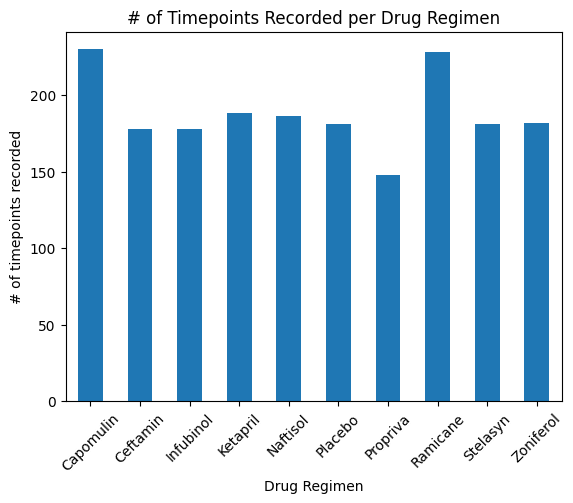

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_data.plot(kind="bar", legend = False)
plt.ylabel('# of timepoints recorded')
plt.title('# of Timepoints Recorded per Drug Regimen')
plt.xticks(rotation=45)
plt.legend
plt.show()

In [18]:
drug_regimen_dictionary = set(clean_pymaceuticals_df['Drug Regimen'])
drug_regimen_dictionary

{'Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'}

In [19]:
drug_regimen_list = []
for drug in drug_regimen_dictionary:
    drug_regimen_list.append(drug)
drug_regimen_list

['Placebo',
 'Propriva',
 'Naftisol',
 'Stelasyn',
 'Ketapril',
 'Infubinol',
 'Zoniferol',
 'Ramicane',
 'Capomulin',
 'Ceftamin']

In [20]:
time_point_list = bar_chart_data['Timepoint'].tolist()
time_point_list

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

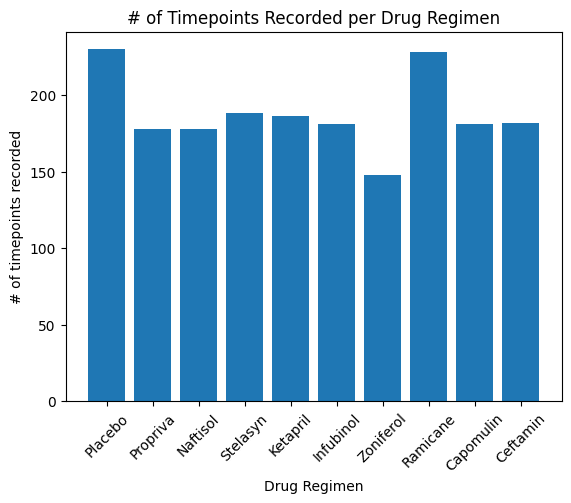

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_list, time_point_list)
plt.xlabel('Drug Regimen')
plt.ylabel('# of timepoints recorded')
plt.title('# of Timepoints Recorded per Drug Regimen')
plt.xticks(rotation=45)
plt.show()

In [22]:
sex_count = clean_pymaceuticals_df['Sex'].value_counts()
sex_count

Sex
Male      958
Female    922
Name: count, dtype: int64

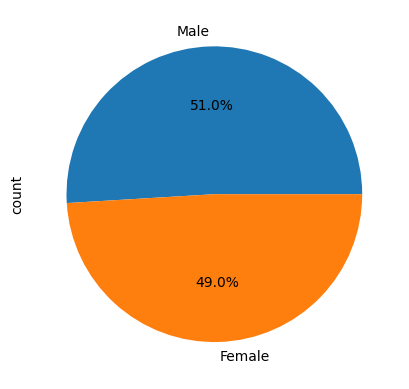

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count.plot(kind="pie", autopct='%1.1f%%')
plt.show()

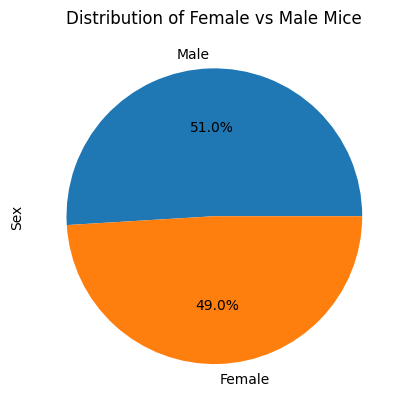

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels=sex_count.index, autopct="%1.1f%%",)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_pymaceuticals_df.groupby("Mouse ID")["Timepoint"].max()
final_tumor_volume = max_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_grouped = final_tumor_volume.merge(clean_pymaceuticals_df, on = ["Mouse ID", "Timepoint"], how = "left")
final_tumor_volume_grouped

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_grouped.loc[final_tumor_volume_grouped["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR for each regimen
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    potential_outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    # Print results
    print(f"{regimen}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


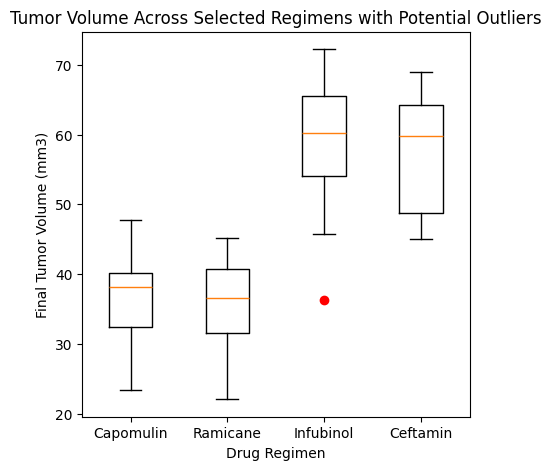

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(5, 5))
plt.boxplot(tumor_vol_data, labels=regimens, sym='ro')
plt.title("Tumor Volume Across Selected Regimens with Potential Outliers")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

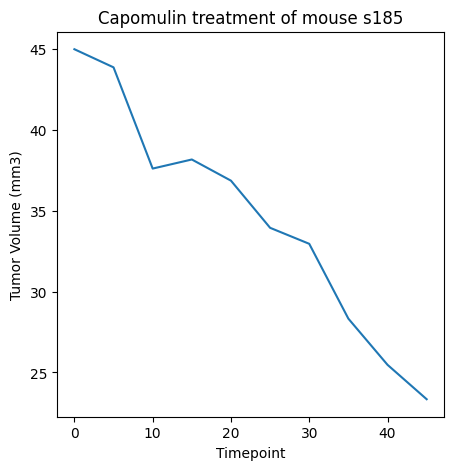

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
selected_mouse_id = clean_pymaceuticals_df.loc[clean_pymaceuticals_df["Drug Regimen"] == "Capomulin", "Mouse ID"].iloc[2]

selected_mouse_data = clean_pymaceuticals_df.loc[(clean_pymaceuticals_df["Mouse ID"] == selected_mouse_id) & (clean_pymaceuticals_df["Drug Regimen"] == "Capomulin")]

plt.figure(figsize=(5, 5))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], linestyle='-',)
plt.title(f"Capomulin treatment of mouse {selected_mouse_id}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_volume = clean_pymaceuticals_df[clean_pymaceuticals_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the mouse metadata to get the weight information
capomulin_data = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on="Mouse ID")
print(capomulin_data)

   Mouse ID  Tumor Volume (mm3) Drug Regimen     Sex  Age_months  Weight (g)
0      b128           41.963636    Capomulin  Female           9          22
1      b742           40.083699    Capomulin    Male           7          21
2      f966           36.505973    Capomulin    Male          16          17
3      g288           41.990097    Capomulin    Male           3          19
4      g316           44.613344    Capomulin  Female          22          22
5      i557           44.805810    Capomulin  Female           1          24
6      i738           39.141053    Capomulin  Female          23          20
7      j119           44.465236    Capomulin  Female           7          23
8      j246           43.216925    Capomulin  Female          21          21
9      l509           44.434474    Capomulin    Male          17          21
10     l897           42.507261    Capomulin    Male          17          19
11     m601           34.847470    Capomulin    Male          22          17

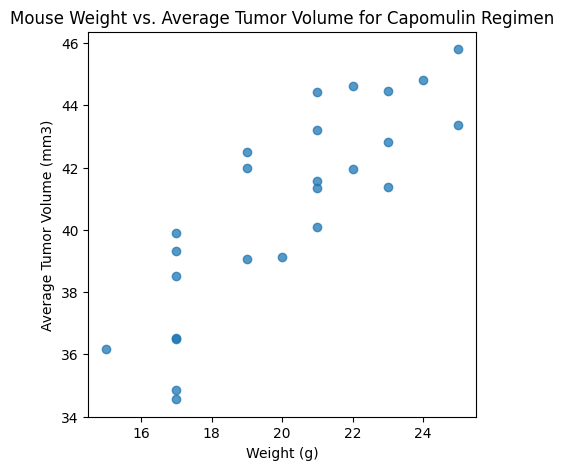

In [56]:
# Create scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], marker="o", alpha=0.75)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = st.pearsonr(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])[0]
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation_coefficient:.2f}")

The correlation coefficient between mouse weight and average tumor volume is 0.84


In [58]:
# Calculate the linear regression model for mouse weight and average tumor volume for Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])

# Create the regression equation
regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"

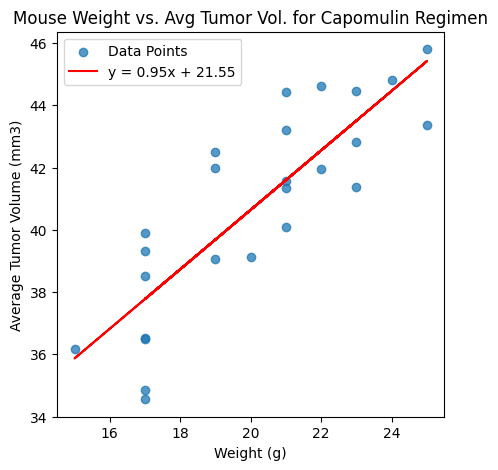

In [65]:
# Create the scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], marker="o", alpha=0.75, label="Data Points")

# Plot the regression line
regress_values = slope * capomulin_data["Weight (g)"] + intercept
plt.plot(capomulin_data["Weight (g)"], regress_values, "r-", label=regression_equation)

# Add labels and a legend
plt.title("Mouse Weight vs. Avg Tumor Vol. for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.show()